In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [2]:
TrainDx = pd.read_csv('../input/prerocessed-danger-nbaiot/TrainDx.csv')
TrainDy = pd.read_csv('../input/prerocessed-danger-nbaiot/TrainDy.csv')
ValDx = pd.read_csv('../input/prerocessed-danger-nbaiot/ValDx.csv')
ValDy = pd.read_csv('../input/prerocessed-danger-nbaiot/ValDy.csv')

In [3]:
clf = svm.SVC(kernel='linear')

In [4]:
TotalTrain = pd.concat([TrainDx, TrainDy], axis=1)

In [5]:
TotalTrain = TotalTrain.sample(100000)

In [6]:
miniTrainX = TotalTrain.drop('danger', axis=1)
miniTrainX

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
446144,-0.702034,-0.049826,-0.587524,0.115806,-0.283101,-0.022445,-0.185597,0.039893,-0.499479,-0.674417,...,-0.662851,0.156001,-0.459430,-0.524823,-0.508298,-1.212242,0.125736,0.551833,0.339220,0.034290
469520,-0.707739,-0.044732,-0.561024,0.018568,0.329441,-0.059359,0.330037,-0.358023,2.182543,0.594636,...,-0.282633,0.745886,-0.515383,-1.260466,-1.324601,-0.787236,-0.186775,-2.017928,-0.846853,0.106053
52040,-0.786475,0.036581,-0.551714,-0.012287,-0.121795,0.000599,0.165930,-0.215166,0.820706,-0.074492,...,0.000590,0.481314,0.883714,-0.262392,0.200058,0.232467,0.033674,-0.138890,0.522964,-0.108567
321941,-0.774556,-0.013440,-0.584127,-0.022965,-0.152467,0.010733,0.022644,-0.114136,0.308246,-0.189258,...,0.046248,0.022311,0.275616,0.280221,-0.035264,-0.391848,0.097447,0.305801,0.316093,0.046003
472393,2.051015,-0.499471,0.008188,-0.433487,-0.176277,-0.948371,-0.142698,0.068438,0.188855,0.332530,...,0.579085,-0.352565,0.764722,-1.138060,-0.038621,-0.126256,-0.120569,-0.577367,0.804943,0.273662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140482,-0.615451,0.331302,-0.550806,0.254643,-0.219999,-0.157212,0.558856,-0.418832,0.655002,-1.383698,...,-0.309895,1.274941,5.287054,-0.435253,0.067806,-0.858204,-0.025714,-0.488472,-0.043140,-0.986532
105252,0.381351,-0.512622,2.529254,1.136630,1.065468,-0.073797,-0.001464,-0.023102,0.684937,-0.545006,...,0.199002,-0.256661,0.459740,-1.257973,-0.083861,-0.057072,-0.076443,-0.526473,0.587955,1.489510
43911,1.892553,-0.362788,-0.068520,-0.097335,-0.014477,-0.799503,-0.008418,0.008470,0.384740,0.362362,...,0.370355,-0.252891,0.691599,-0.234604,-1.214453,0.496962,0.040780,0.057880,0.523651,-1.045032
305563,-0.757696,0.050846,-0.663661,-0.066022,-0.113617,-0.011972,0.132743,-0.191660,0.647007,0.560479,...,-0.999900,0.113604,-0.488306,0.392977,-0.843980,0.092421,-0.020458,-2.710225,-0.804597,0.235107


In [7]:
miniTrainY = TotalTrain.danger
miniTrainY

446144    0
469520    0
52040     0
321941    0
472393    1
         ..
140482    0
105252    1
43911     1
305563    0
435138    0
Name: danger, Length: 100000, dtype: int64

In [8]:
clf.fit(miniTrainX, miniTrainY)

SVC(kernel='linear')

## Accuracies

In [9]:
def accFinder(X, y):
    return metrics.accuracy_score(clf.predict(X), y)

In [10]:
acc_card = []

In [11]:
acc_card.append(accFinder(TrainDx, TrainDy))

In [12]:
acc_card.append(accFinder(ValDx, ValDy))

In [13]:
TestDx = pd.read_csv('../input/prerocessed-danger-nbaiot/TestDx.csv')
TestDy = pd.read_csv('../input/prerocessed-danger-nbaiot/TestDy.csv')
acc_card.append(accFinder(TestDx, TestDy))

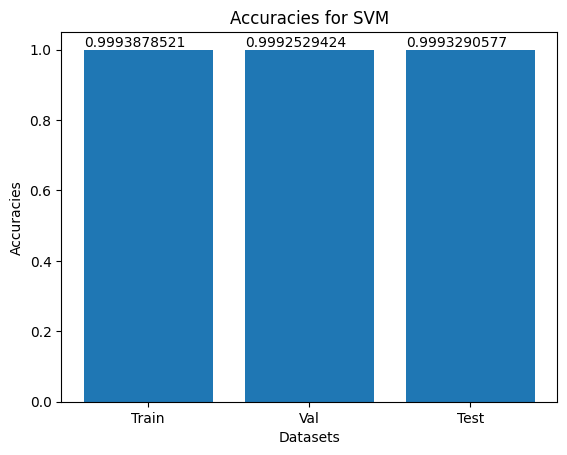

In [14]:
# Create a list of indices for the x-axis
indices = range(len(acc_card))
# Create the bar graph
bars = plt.bar(indices, acc_card)
# Optionally, you can set the labels for the x-axis to be something other than the indices
labels = ['Train', 'Val', 'Test']
plt.xticks(indices, labels)
# Labeling the axes
plt.xlabel('Datasets')
plt.ylabel('Accuracies')
# Giving a title to the graph
plt.title('Accuracies for SVM')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, '{:.10f}'.format(yval), va='bottom') # va: vertical alignment
plt.show()

## Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
TestPreds = clf.predict(TestDx)

In [17]:
cm = pd.DataFrame(confusion_matrix(TestPreds, TestDy, labels=[0,1]))
cm

,0,1
0,153764,59
1,145,150082


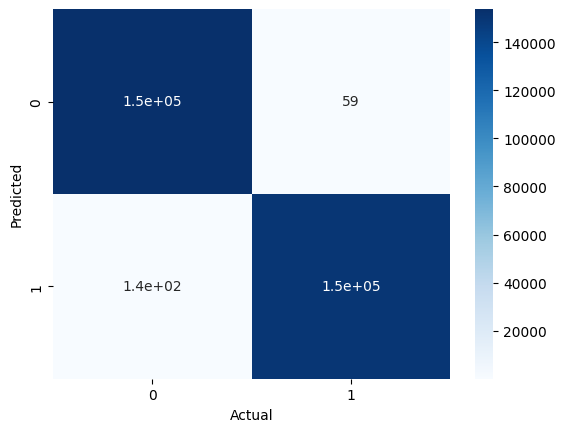

In [18]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted');

In [19]:
def recall(type, TestPreds, TestDy, labels):
    confMat = confusion_matrix(TestPreds, TestDy, labels=labels)
    true = confMat[type][type]
    total = 0
    for i in range(len(labels)):
        total += confMat[i][type]
    return true/total

def precision(type, TestPreds, TestDy, labels):
    confMat = confusion_matrix(TestPreds, TestDy, labels=labels)
    true = confMat[type][type]
    total = 0
    for i in range(len(labels)):
        total += confMat[type][i]
    return true/total

def specificity(type, TestPreds, TestDy, labels):
    confMat = confusion_matrix(TestPreds, TestDy, labels=labels)
    true = 0
    for i in range(len(labels)):
        if(i==type):
            continue;
        true += confMat[i][i]
    total = 0
    for j in range(len(labels)):
        if(j==type):
            continue
        for i in range(len(labels)):
            total += confMat[i][j]
    return true/total

In [20]:
labels=[0,1]

In [21]:
for i in range(len(labels)):
    print('recall of class '+str(i)+': '+str(recall(i, TestPreds, TestDy, [0,1])))

recall of class 0: 0.9990578848540371
recall of class 1: 0.999607036052777


In [22]:
for i in range(len(labels)):
    print('precision of class '+str(i)+': '+str(precision(i, TestPreds, TestDy, [0,1])))

precision of class 0: 0.9996164422745624
precision of class 1: 0.9990347940117289


In [23]:
for i in range(len(labels)):
    print('specificity of class '+str(i)+': '+str(specificity(i, TestPreds, TestDy, [0,1])))

specificity of class 0: 0.999607036052777
specificity of class 1: 0.9990578848540371


## Saving the model

In [24]:
import pickle
with open('SVMDanger.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [25]:
import joblib
dt = {
    'SVMDanger':clf,
}
joblib.dump(dt, 'SVMDanger.joblib')

['SVMDanger.joblib']